In [208]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load CSV files into dataframes and merge them using the Year field as an index
candidates = pd.read_csv('sig.tse.jus.br/candidates.csv')
candidates.set_index(['year'], inplace=True)
voters = pd.read_csv('sig.tse.jus.br/voters.csv')
voters.set_index(['year'], inplace=True)
election = pd.merge(candidates, voters,  how="outer", on=["year"])

# releases the memory allocated to dataframes
del[[candidates,voters]]

# Convert all fields of type float to integer in the dataframe
for col in election.columns:
    if election[col].dtype == 'float64':
        election[col] = election[col].astype('Int64')

# Sort dataframes data in descending order by year        
election.sort_values(by=['year'], ascending=False, inplace=True)

# Fill NA/NaN values with 0
election.fillna(0, inplace=True)

#Filters data from the years in which municipal elections took place in Brazil
municipal_election = election.filter(items=[2020,2016,2012,2008,2004,2000],axis=0)

# calculates the percentage of data changes from year to year
# and sorts in descending order by year
pct_change_municipal_election = municipal_election.sort_values(by=['year'])\
    .pct_change().sort_values(by=['year'],ascending=False)\
    .rename(columns={"candidates": "pct_change_candidates", "voters": "pct_change_voters"})

# Includes calculations of percentages of data changes in the municipal elections dataframe
municipal_election = municipal_election.merge(pct_change_municipal_election, how="outer", on=["year"])

del[[pct_change_municipal_election]]

#print(municipal_election['pct_change_voters'].fillna(0))

#print(municipal_election)

year
2020    0.026578
2016     0.04002
2012         inf
2008         NaN
2004         NaN
2000         0.0
Name: pct_change_voters, dtype: Float64
      candidates     voters  pct_change_candidates  pct_change_voters
year                                                                 
2020      557910  147918483               0.122205           0.026578
2016      497155  144088912               0.029162            0.04002
2012      483068  138544348               0.266409                inf
2008      381447          0              -0.050629                NaN
2004      401789          0               0.046972                NaN
2000      383763          0                   <NA>               <NA>


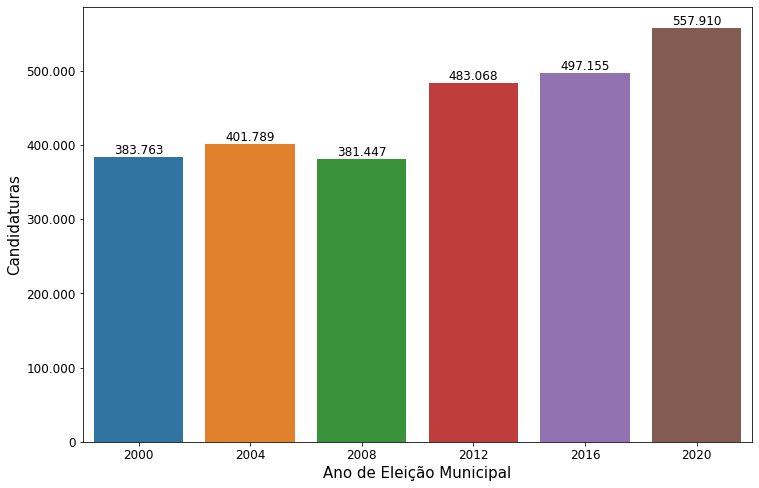

In [210]:
# Defining the plotsize
plt.figure(figsize=(12, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
splot = sns.barplot(x=municipal_election.index, y="candidates", data=municipal_election)

#sns.despine()
#sns.set_style('white')

# Setting the x-acis label and its size
plt.xlabel("Ano de Eleição Municipal", size=15)
# changing the fontsize of xticks
plt.xticks(fontsize=12)

# Setting the y-axis label and its size
plt.ylabel("Candidaturas",size=15)
# changing the fontsize of yticks
plt.yticks(fontsize=12)

splot.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x),',').replace(',','.')))

# displays the data values in the graph
#splot.bar_label(splot.containers[0],size=12)
splot.bar_label(splot.containers[0],labels=[f'{x:,.0f}'.replace(',','.') for x in splot.containers[0].datavalues], 
                size=12)

plt.savefig("number_candidates_municipal_elections.jpg",transparent = False)

# print(municipal_election)

# plotting the graph
plt.show()

In [116]:
# Load CSV files into dataframes and merge them using the Year field as an index
electoralJustice = pd.read_csv('br_electoral_JusticeNumbers.csv')

municipal_election_JN = electoralJustice[electoralJustice.year.isin([2020,2016,2012,2008,2004,2000])].sort_values(by=['year'], ascending=False)


municipal_election_JN

#municipal_election_2020 = electoralJustice[electoralJustice.year == 2020]

#municipal_election_2020

,instance,year,new_cases,original_cases,appeal_cases,eletronic_cases,finished_cases,pendent_cases,decisions_cases,suspended_cases,internal_appeal,internal_appeals_judged,internal_appeals_pendent,magistrates,judiciary_civil_servants
9,1,2020,1324239,1324239.0,NaN,1318630.0,641282,726907,711299,62326.0,10627,12560.0,1646.0,2645,10693.0
19,2,2020,42495,42495.0,31721.0,41747.0,37079,35390,24945,38.0,5003,4664.0,5003.0,189,2369.0
29,3,2020,4796,1180.0,3616.0,4614.0,4885,6215,867,64.0,5885,2738.0,2367.0,14,254.0
5,1,2016,1005702,1005702.0,NaN,NaN,628584,595231,429977,42810.0,2115,1821.0,758.0,3036,12315.0
15,2,2016,46031,46031.0,37773.0,510.0,44461,39419,15428,290.0,4778,4660.0,4778.0,186,1563.0
25,3,2016,5598,137.0,5461.0,NaN,5479,6010,4364,47.0,2024,3496.0,21.0,14,165.0
1,1,2012,754155,754155.0,NaN,NaN,388319,435709,346910,NaN,2623,NaN,349.0,3032,11935.0
11,2,2012,63615,63615.0,NaN,NaN,65431,73867,13218,NaN,11536,NaN,11536.0,257,1598.0
21,3,2012,12793,NaN,NaN,NaN,8422,15880,2989,NaN,3834,NaN,643.0,14,NaN


In [124]:
# municipal_election_2020.sum(axis = 0)
# municipal_election_2020['new_cases'].sum(axis=0)
municipal_election_JN

,instance,year,new_cases,original_cases,appeal_cases,eletronic_cases,finished_cases,pendent_cases,decisions_cases,suspended_cases,internal_appeal,internal_appeals_judged,internal_appeals_pendent,magistrates,judiciary_civil_servants
9,1,2020,1324239,1324239.0,NaN,1318630.0,641282,726907,711299,62326.0,10627,12560.0,1646.0,2645,10693.0
19,2,2020,42495,42495.0,31721.0,41747.0,37079,35390,24945,38.0,5003,4664.0,5003.0,189,2369.0
29,3,2020,4796,1180.0,3616.0,4614.0,4885,6215,867,64.0,5885,2738.0,2367.0,14,254.0
5,1,2016,1005702,1005702.0,NaN,NaN,628584,595231,429977,42810.0,2115,1821.0,758.0,3036,12315.0
15,2,2016,46031,46031.0,37773.0,510.0,44461,39419,15428,290.0,4778,4660.0,4778.0,186,1563.0
25,3,2016,5598,137.0,5461.0,NaN,5479,6010,4364,47.0,2024,3496.0,21.0,14,165.0
1,1,2012,754155,754155.0,NaN,NaN,388319,435709,346910,NaN,2623,NaN,349.0,3032,11935.0
11,2,2012,63615,63615.0,NaN,NaN,65431,73867,13218,NaN,11536,NaN,11536.0,257,1598.0
21,3,2012,12793,NaN,NaN,NaN,8422,15880,2989,NaN,3834,NaN,643.0,14,NaN


In [128]:
municipal_election_JN_sum = municipal_election_JN.groupby('year').sum()

municipal_election_JN_sum

#print(municipal_election_JN.groupby('year').groups)

,instance,new_cases,original_cases,appeal_cases,eletronic_cases,finished_cases,pendent_cases,decisions_cases,suspended_cases,internal_appeal,internal_appeals_judged,internal_appeals_pendent,magistrates,judiciary_civil_servants
year,,,,,,,,,,,,,,
2012,6,830563,817770.0,0.0,0.0,462172,525456,363117,0.0,17993,0.0,12528.0,3303,13533.0
2016,6,1057331,1051870.0,43234.0,510.0,678524,640660,449769,43147.0,8917,9977.0,5557.0,3236,14043.0
2020,6,1371530,1367914.0,35337.0,1364991.0,683246,768512,737111,62428.0,21515,19962.0,9016.0,2848,13316.0


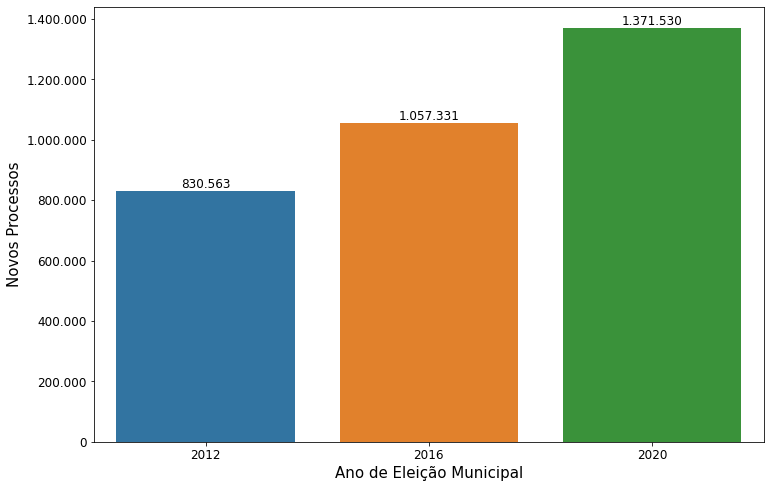

In [211]:
# Defining the plotsize
plt.figure(figsize=(12, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
splot = sns.barplot(x=municipal_election_JN_sum.index, y="new_cases", data=municipal_election_JN_sum)

#sns.despine()
#sns.set_style('white')

# Setting the x-acis label and its size
plt.xlabel("Ano de Eleição Municipal", size=15)
# changing the fontsize of xticks
plt.xticks(fontsize=12)

# Setting the y-axis label and its size
plt.ylabel("Novos Processos",size=15)
# changing the fontsize of yticks
plt.yticks(fontsize=12)

#splot.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x),',')))
splot.get_yaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x),',').replace(',','.')))

# displays the data values in the graph
splot.bar_label(splot.containers[0],labels=[f'{x:,.0f}'.replace(',','.') for x in splot.containers[0].datavalues], 
                size=12)

plt.savefig("new_cases_municipal_elections.jpg",transparent = False)


# plotting the graph
plt.show()

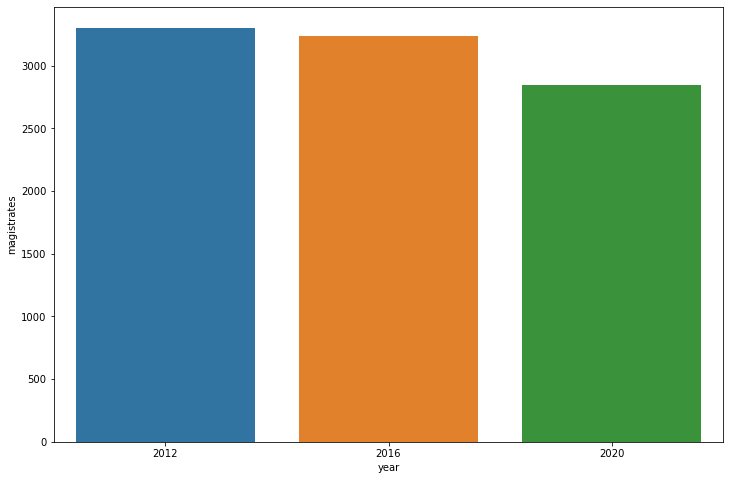

In [212]:
# Defining the plotsize
plt.figure(figsize=(12, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
splot = sns.barplot(x=municipal_election_JN_sum.index, y="magistrates", data=municipal_election_JN_sum)

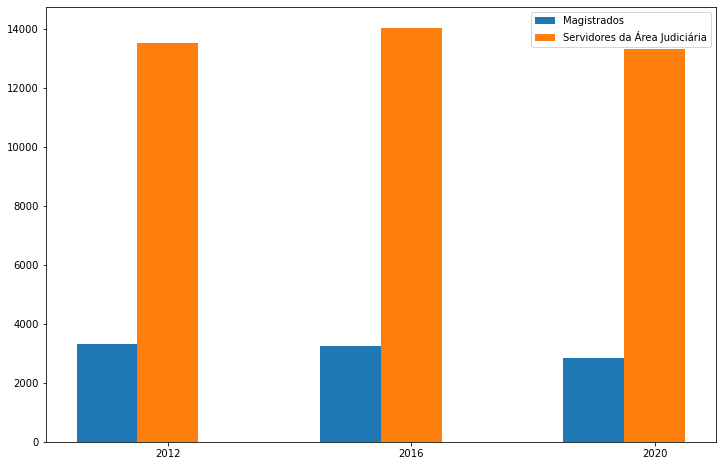

In [236]:
fig = plt.subplots(figsize =(12, 8))
barWidth = 0.25

# Set position of bar on X axis
br1 = np.arange(len(municipal_election_JN_sum.index))
br2 = [x + barWidth for x in br1]

plt.bar(br1, municipal_election_JN_sum.magistrates,width = barWidth, label='Magistrados')
plt.bar(br2, municipal_election_JN_sum.judiciary_civil_servants,width = barWidth,label='Servidores da Área Judiciária')

plt.xticks([r + barWidth for r in range(len(municipal_election_JN_sum.index))],
        ['2012', '2016', '2020'])


plt.savefig("hr_municipal_elections.jpg",transparent = False)

plt.legend()
plt.show()

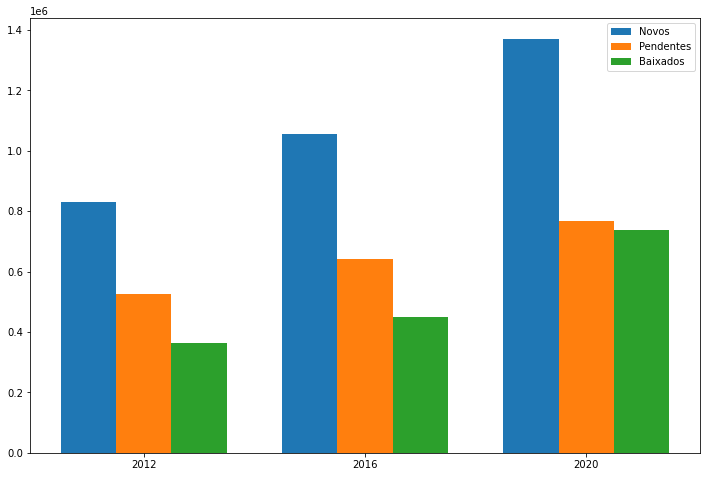

In [235]:

fig = plt.subplots(figsize =(12, 8))
barWidth = 0.25

# Set position of bar on X axis
br1 = np.arange(len(municipal_election_JN_sum.index))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, municipal_election_JN_sum.new_cases,width = barWidth, label='Novos')
plt.bar(br2, municipal_election_JN_sum.pendent_cases,width = barWidth,label='Pendentes')
plt.bar(br3, municipal_election_JN_sum.decisions_cases,width = barWidth,label='Baixados')

plt.xticks([r + barWidth for r in range(len(municipal_election_JN_sum.index))],
        ['2012', '2016', '2020'])


plt.savefig("cases_municipal_elections.jpg",transparent = False)

plt.legend()
plt.show()
